In [3]:
import requests
import matplotlib.pyplot as plt

In [4]:
# Function to fetch stock data from Alpha Vantage
def get_stock_data(symbol):
    api_key = 'ZCXXP8KLU02WGO7O'  # Replace with your API key
    base_url = 'https://www.alphavantage.co/query'

    params = {
        'function': 'TIME_SERIES_MONTHLY_ADJUSTED',
        'symbol': symbol,
        'apikey': api_key,
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()['Monthly Adjusted Time Series']
    else:
        print(f"Failed to fetch data for {symbol}. Status code: {response.status_code}")
        return None


In [5]:
# List of stock symbols
stocks = ['GOOGL', 'AAPL', 'META', 'AMZN', 'MSFT', 'SNAP']

In [6]:
# Fetch data for each stock
stock_data = {}
for stock in stocks:
    stock_data[stock] = get_stock_data(stock)


In [7]:
# Function to plot stock data
def plot_stock_data(stock_symbol, stock_data):
    dates = list(stock_data.keys())
    prices = [float(stock_data[date]['5. adjusted close']) for date in dates]

    plt.plot(dates, prices, label=stock_symbol)

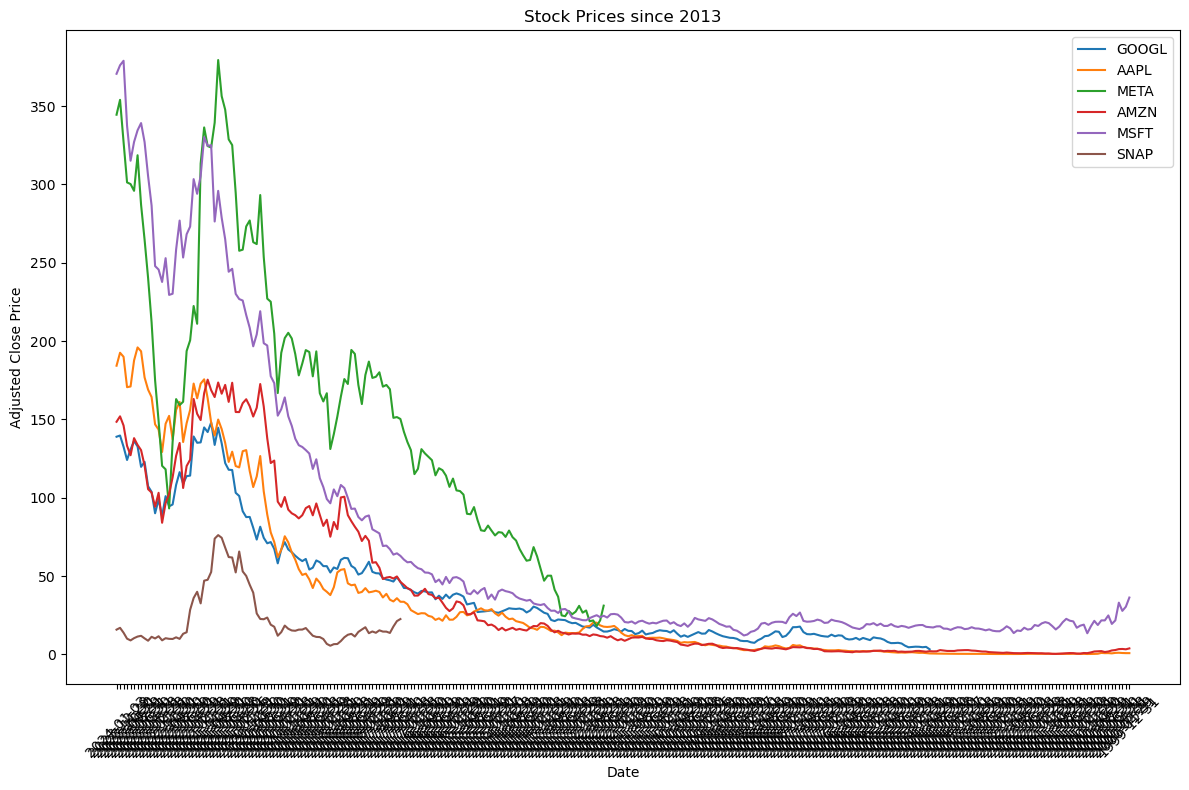

In [8]:
# Plotting
plt.figure(figsize=(12, 8))

for stock_symbol in stocks:
    plot_stock_data(stock_symbol, stock_data[stock_symbol])

plt.title('Stock Prices since 2013')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()